### 1. Project Title & Overview

### AI-Powered Task Management System

**Author**        : Sriyanka Sarkar  
**Organization**   : Zaalima Technologies (Internship Project)  
**Timeline**       : October – November 2025  

---

###  Objective  
Build an intelligent system using NLP and ML to:
- Automatically classify tasks  
- Prioritize based on urgency and deadlines  
- Assign tasks fairly based on workload and behavior


### 2. Import Libraries

In [488]:
# Basic Libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# NLP
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

# Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix


### 3. Load Dataset

##  Project Dataset Overview – Synthetic Task Management System

This dataset contains 58 rows simulating a realistic task management system. It is used to build and evaluate an AI-powered model for task prioritization and smart assignment.

###  Dataset Structure

Each row represents a task with the following columns:

- **Task ID**: Unique identifier (e.g., `T001` to `T058`)
- **Description**: Brief summary of the task (e.g., “Fix login bug”)
- **Deadline**: Task due date in `YYYY-MM-DD` format
- **Assigned To**: Name of the team member responsible for the task
- **Priority**: Urgency level — `High`, `Medium`, or `Low`
- **Status**: Task progress — `Pending`, `In Progress`, or `Completed`

###  Project Use Cases

This dataset supports:
- Exploratory Data Analysis (EDA)
- NLP preprocessing and feature engineering
- Training a priority prediction model using Naive Bayes
- Implementing smart task assignment logic based on workload balancing

The dataset reflects common task types such as bug fixes, feature development, documentation, and reporting, making it suitable for modeling intelligent task routing in team environments.


In [491]:
df = pd.read_excel(r'C:\Users\Internship_zaalima\task_management_system_data.xlsx')
df
#df.head()


,Task ID,Description,Deadline,Assigned To,Priority,Status
0,T001,Fix login issue,2025-10-20,Priya Das,High,Pending
1,T002,Prepare monthly report,2025-10-22,Rahul Sen,Medium,Completed
2,T003,Update dashboard layout,2025-10-25,Sneha Roy,Low,Pending
3,T004,Write API documentation,2025-10-19,Arjun Mehta,Medium,In Progress
4,T005,Resolve payment gateway bug,2025-10-21,Priya Das,High,Pending
5,T006,Design new landing page,2025-10-28,Sneha Roy,Low,Completed
6,T007,Analyze user feedback,2025-10-23,Rahul Sen,Medium,In Progress
7,T008,Optimize database queries,2025-10-24,Arjun Mehta,High,Pending
8,T009,Create onboarding email template,2025-10-26,Priya Das,Low,Completed
9,T010,Test mobile responsiveness,2025-10-27,Sneha Roy,Medium,In Progress


### 4. Dataset Information

In [493]:
## Check structure 
df.info()
# Summary statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Task ID      58 non-null     object        
 1   Description  57 non-null     object        
 2   Deadline     57 non-null     datetime64[ns]
 3   Assigned To  57 non-null     object        
 4   Priority     57 non-null     object        
 5   Status       57 non-null     object        
dtypes: datetime64[ns](1), object(5)
memory usage: 2.8+ KB


,Deadline
count,57
mean,2025-11-11 02:31:34.736841984
min,2025-10-19 00:00:00
25%,2025-10-30 00:00:00
50%,2025-11-11 00:00:00
75%,2025-11-22 00:00:00
max,2025-12-06 00:00:00


### 5. Check Missing Values

In [495]:
# Count missing values
df.isnull().sum()

Task ID        0
Description    1
Deadline       1
Assigned To    1
Priority       1
Status         1
dtype: int64

### 6. Data Cleaning – Remove Duplicates and Nulls

In [497]:
# Remove exact duplicates
df = df.drop_duplicates()

# Drop rows with nulls in essential columns
df = df.dropna(subset=['Description', 'Deadline', 'Assigned To', 'Priority', 'Status'])

# Convert Deadline to datetime
df['Deadline'] = pd.to_datetime(df['Deadline'], errors='coerce')

# Reset index
df.reset_index(drop=True, inplace=True)

In [498]:
#We clean the dataset by removing duplicates and rows with missing critical fields. Deadlines are converted to datetime format for time-based analysis.
df

,Task ID,Description,Deadline,Assigned To,Priority,Status
0,T001,Fix login issue,2025-10-20,Priya Das,High,Pending
1,T002,Prepare monthly report,2025-10-22,Rahul Sen,Medium,Completed
2,T003,Update dashboard layout,2025-10-25,Sneha Roy,Low,Pending
3,T004,Write API documentation,2025-10-19,Arjun Mehta,Medium,In Progress
4,T005,Resolve payment gateway bug,2025-10-21,Priya Das,High,Pending
5,T006,Design new landing page,2025-10-28,Sneha Roy,Low,Completed
6,T007,Analyze user feedback,2025-10-23,Rahul Sen,Medium,In Progress
7,T008,Optimize database queries,2025-10-24,Arjun Mehta,High,Pending
8,T009,Create onboarding email template,2025-10-26,Priya Das,Low,Completed
9,T010,Test mobile responsiveness,2025-10-27,Sneha Roy,Medium,In Progress


### 7. Summary Statistics

In [500]:
# Summary statistics
df.describe()

,Deadline
count,53
mean,2025-11-11 02:43:01.132075520
min,2025-10-19 00:00:00
25%,2025-10-29 00:00:00
50%,2025-11-11 00:00:00
75%,2025-11-23 00:00:00
max,2025-12-06 00:00:00


### 8.Frequency Tables

In [502]:
#We analyze how tasks are distributed across priority levels, statuses, and team members.

df['Priority'].value_counts()

Priority
Medium    22
High      18
Low       13
Name: count, dtype: int64

In [503]:
df['Status'].value_counts()

Status
Completed      22
Pending        17
In Progress    14
Name: count, dtype: int64

In [504]:
df['Assigned To'].value_counts().head(10)

Assigned To
Priya Das             7
Rahul Sen             4
Sneha Roy             4
Arjun Mehta           4
Neha Kapoor           4
Rohan Sinha           3
Ayesha Banerjee       3
Kunal Verma           3
Rakesh Ghosh          2
Reema Bhattacharya    1
Name: count, dtype: int64

### 9. Task Count by Priority

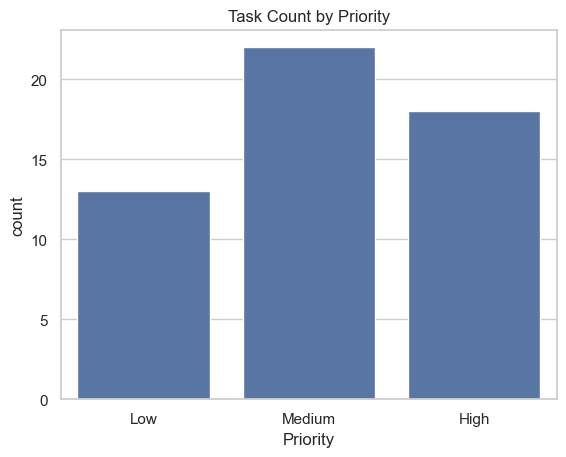

In [506]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Priority', order=['Low', 'Medium', 'High'])
plt.title("Task Count by Priority")
plt.show()


### 10. Task Count by Status

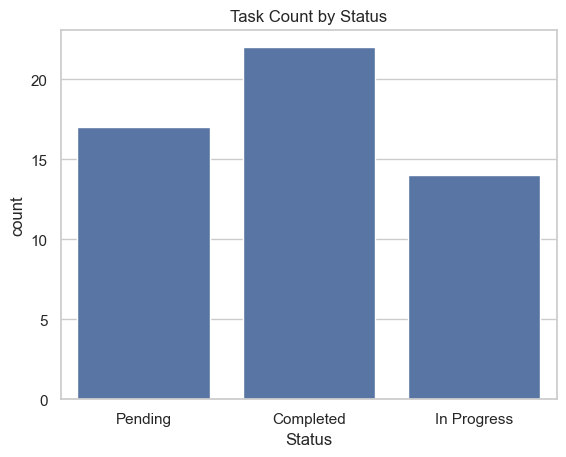

In [508]:
sns.countplot(data=df, x='Status')
plt.title("Task Count by Status")
plt.show()


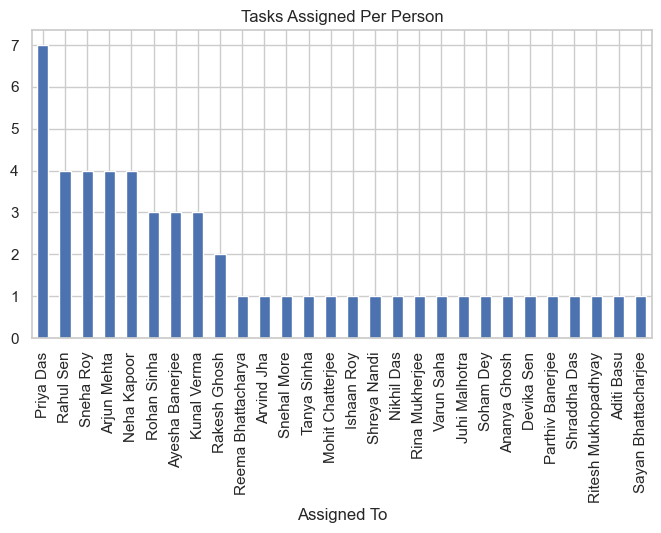

In [509]:
plt.figure(figsize=(8,4))
df['Assigned To'].value_counts().plot(kind='bar')
plt.title("Tasks Assigned Per Person")
plt.show()


### 11. Feature Engineering – DateTime Fields
##### We extract year, month, and weekday from the deadline to analyze task patterns over time.


In [511]:
# Extract date features
df['Year'] = df['Deadline'].dt.year
df['Month'] = df['Deadline'].dt.month
df['Weekday'] = df['Deadline'].dt.day_name()

df[['Deadline', 'Year', 'Month', 'Weekday']].head()


,Deadline,Year,Month,Weekday
0,2025-10-20,2025,10,Monday
1,2025-10-22,2025,10,Wednesday
2,2025-10-25,2025,10,Saturday
3,2025-10-19,2025,10,Sunday
4,2025-10-21,2025,10,Tuesday


### New features help ML understand urgency.
##### A short table showing Description and Days_Left for the first 5 rows.

In [513]:
df['Deadline'] = pd.to_datetime(df['Deadline'])
df['Days_Left'] = (df['Deadline'] - pd.Timestamp.today()).dt.days
df[['Description','Days_Left']].head()

,Description,Days_Left
0,Fix login issue,-12
1,Prepare monthly report,-10
2,Update dashboard layout,-7
3,Write API documentation,-13
4,Resolve payment gateway bug,-11


### 12. Boxplot – Priority Distribution

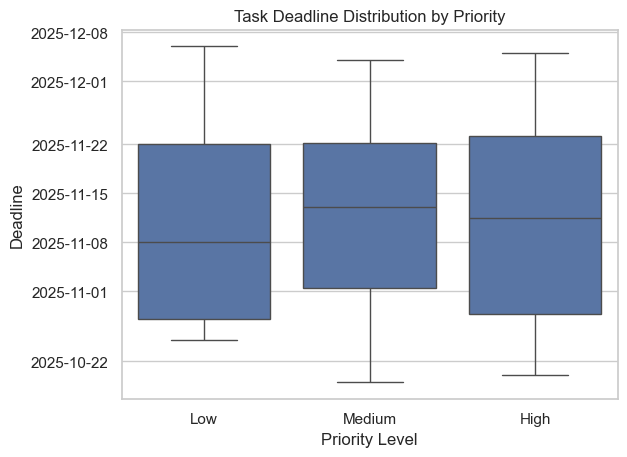

In [515]:
# Create boxplot of deadlines grouped by priority
sns.boxplot(data=df, x='Priority', y='Deadline', order=['Low', 'Medium', 'High'])
plt.title("Task Deadline Distribution by Priority")
plt.xlabel("Priority Level")
plt.ylabel("Deadline")
plt.xticks(rotation=0)
plt.show()


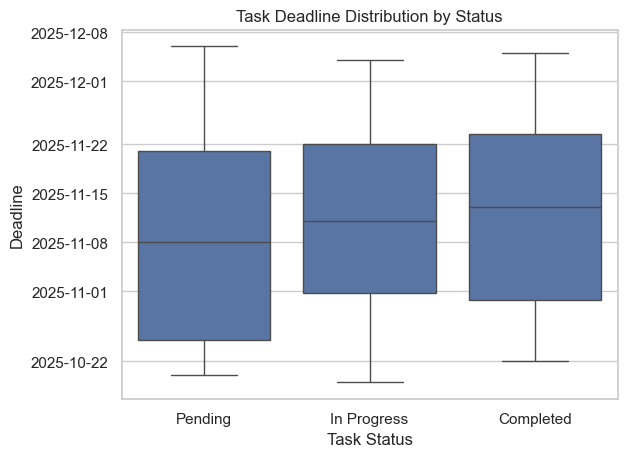

In [516]:
# Boxplot of deadlines grouped by task status
sns.boxplot(data=df, x='Status', y='Deadline', order=['Pending', 'In Progress', 'Completed'])
plt.title("Task Deadline Distribution by Status")
plt.xlabel("Task Status")
plt.ylabel("Deadline")
plt.xticks(rotation=0)
plt.show()


### 12.Histogram – Task Deadlines

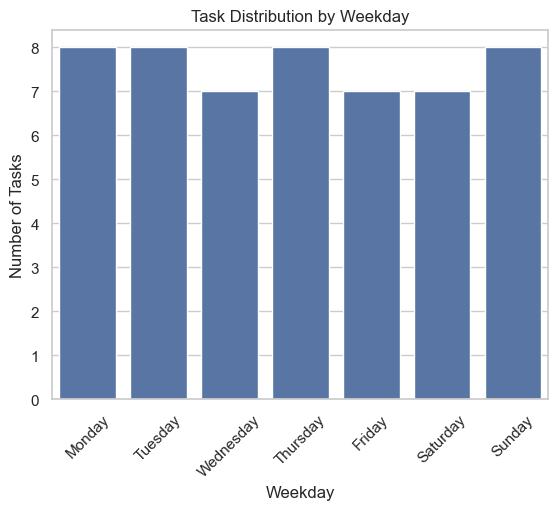

In [518]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'Weekday' column exists
df['Weekday'] = df['Deadline'].dt.day_name()

# Plot histogram of task count by weekday
sns.countplot(data=df, x='Weekday',
              order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Task Distribution by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Number of Tasks")
plt.xticks(rotation=45)
plt.show()


### 📊 Histogram – Task Count by Weekday

This histogram shows how task deadlines are distributed across weekdays. It helps identify which days are most task-heavy and whether weekends are underutilized.

- **X-axis**: Weekday (Monday to Sunday)
- **Y-axis**: Number of tasks due
- **Insight**: If most tasks cluster around mid-week, it may reflect sprint planning. Sparse weekends suggest buffer or downtime.


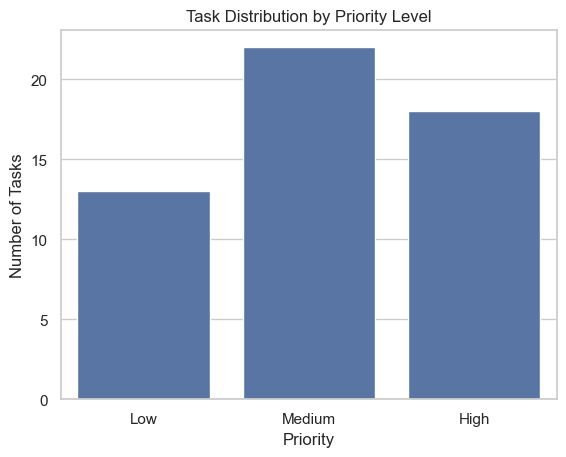

In [520]:
# Histogram of task count by priority
sns.countplot(data=df, x='Priority', order=['Low', 'Medium', 'High'])
plt.title("Task Distribution by Priority Level")
plt.xlabel("Priority")
plt.ylabel("Number of Tasks")
plt.show()


### 📊 Histogram – Task Count by Priority Level

This histogram shows how tasks are distributed across different priority levels. It helps identify whether the workload is skewed toward high-urgency tasks or balanced across categories.

- **X-axis**: Task priority (Low, Medium, High)
- **Y-axis**: Number of tasks
- **Insight**: A high number of "High" priority tasks may indicate urgency overload. A balanced distribution supports smoother workflow planning.


C:\Users\sriya\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\sriya\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\sriya\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\sriya\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\sriya\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\sriya\AppData\Ro

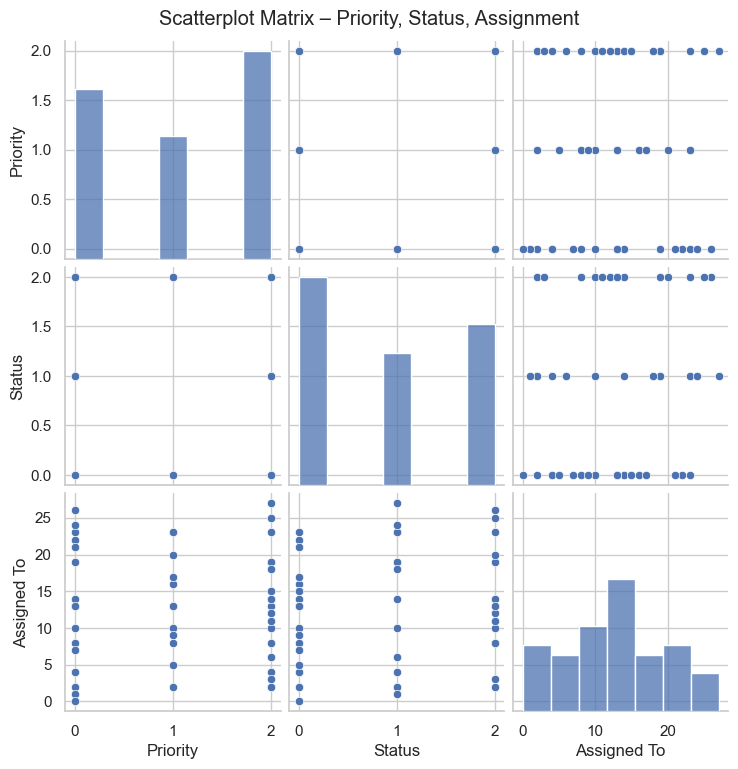

In [522]:

# Select relevant categorical columns
plot_df = df[['Priority', 'Status', 'Assigned To']].dropna()

# Encode categorical values numerically for plotting
encoded_df = plot_df.copy()
encoded_df['Priority'] = encoded_df['Priority'].astype('category').cat.codes
encoded_df['Status'] = encoded_df['Status'].astype('category').cat.codes
encoded_df['Assigned To'] = encoded_df['Assigned To'].astype('category').cat.codes

# Create the pair plot
sns.set(style="whitegrid")
sns.pairplot(encoded_df, diag_kind="hist", palette="Oranges")
plt.suptitle("Scatterplot Matrix – Priority, Status, Assignment", y=1.02)
plt.show()


### Correlation Matrix – Task Attributes

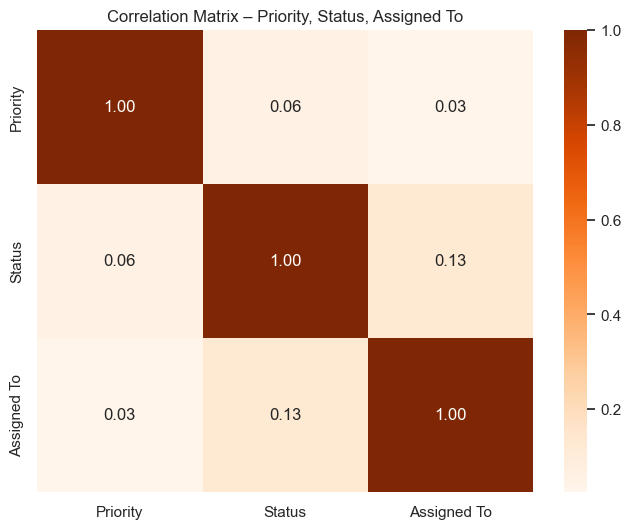

In [530]:

# Select relevant categorical columns
corr_df = df[['Priority', 'Status', 'Assigned To']].dropna()

# Encode categorical columns numerically
encoded = corr_df.copy()
encoded['Priority'] = encoded['Priority'].astype('category').cat.codes
encoded['Status'] = encoded['Status'].astype('category').cat.codes
encoded['Assigned To'] = encoded['Assigned To'].astype('category').cat.codes

# Compute correlation matrix
correlation_matrix = encoded.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Oranges', fmt=".2f")
plt.title("Correlation Matrix – Priority, Status, Assigned To")
plt.show()


## 📊 Correlation Matrix Summary

This matrix shows how three variables relate to each other:

- **Priority & Status**: Weak correlation (0.06) – urgency doesn’t strongly affect progress.
- **Priority & Assigned To**: Very low correlation (0.03) – tasks aren’t assigned based on urgency.
- **Status & Assigned To**: Weak correlation (0.06) – progress varies slightly across team members.

🔎 Insight: These low values suggest task urgency, progress, and assignment are mostly independent—supporting the need for smart, balanced task assignment logic.


### 13.Variable Definitions

- **Independent Variable (X)**: `Processed_Description` — the cleaned and lemmatized task description text.
- **Dependent Variable (y)**: `Priority` — the target label we want to predict (High, Medium, Low).

This setup allows us to train a model that learns patterns in task descriptions and predicts their urgency level.


### 14.NLP Preprocessing
##### Cleaned task descriptions using tokenization, stopword removal, and lemmatization

In [537]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    tokens = word_tokenize(str(text).lower())
    tokens = [t for t in tokens if t not in string.punctuation]
    tokens = [t for t in tokens if t not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    return " ".join(tokens)

df['Processed_Description'] = df['Description'].apply(preprocess_text)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sriya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sriya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sriya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### 15.TF-IDF Vectorization
##### Converted text into numerical features

In [540]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=500)
X = tfidf.fit_transform(df['Processed_Description'])
y = df['Priority']



### 16. Train-Test Split

In [543]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### 17. Model Training — Naive Bayes
##### Trained model to predict task priority

In [546]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)


MultinomialNB()

### 18. Model Evaluation
##### Trained model to predict task priority

In [549]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = nb_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.36363636363636365

Classification Report:
               precision    recall  f1-score   support

        High       1.00      0.29      0.44         7
         Low       0.00      0.00      0.00         2
      Medium       0.22      1.00      0.36         2

    accuracy                           0.36        11
   macro avg       0.41      0.43      0.27        11
weighted avg       0.68      0.36      0.35        11


Confusion Matrix:
 [[2 0 5]
 [0 0 2]
 [0 0 2]]


C:\Users\sriya\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sriya\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sriya\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

### 19. Smart Task Assignment Logic
##### Assigned tasks based on predicted priority and team workload

In [552]:
# ✅ Initialize workload tracker for your team
workload_tracker = {
    'Priya Das': 0,
    'Rahul Sen': 0,
    'Sneha Roy': 0,
    # Add more team members here if needed
}

# ✅ Smart Task Assignment Function
def assign_task(description, team_members):
    global workload_tracker

    # Step 1: Preprocess the task description
    processed = preprocess_text(description)

    # Step 2: Convert to TF-IDF vector
    vector = tfidf.transform([processed])

    # Step 3: Predict priority using trained Naive Bayes model
    predicted_priority = nb_model.predict(vector)[0]

    # Step 4: Assign to least-loaded team member
    assigned = sorted(
        [(member, workload_tracker.get(member, 0)) for member in team_members],
        key=lambda x: (x[1], x[0])  # Sort by workload, then alphabetically
    )[0][0]

    # Step 5: Update workload tracker
    workload_tracker[assigned] += 1

    return predicted_priority, assigned


### Example Usage

In [555]:
team = ['Priya Das', 'Rahul Sen', 'Sneha Roy']

tasks = [
    "Fix login bug",
    "Design landing page",
    "Analyze feedback",
    "Write documentation",
    "Create email template",
    "Build dashboard",
    "Prepare monthly budget analysis report",
    "Update user profile API",
    "Draft onboarding email for new customers"
]

for task in tasks:
    priority, assignee = assign_task(task, team)
    print(f"Task: {task} | Predicted Priority: {priority} | Assigned To: {assignee}")


Task: Fix login bug | Predicted Priority: Medium | Assigned To: Priya Das
Task: Design landing page | Predicted Priority: Medium | Assigned To: Rahul Sen
Task: Analyze feedback | Predicted Priority: Medium | Assigned To: Sneha Roy
Task: Write documentation | Predicted Priority: Medium | Assigned To: Priya Das
Task: Create email template | Predicted Priority: Low | Assigned To: Rahul Sen
Task: Build dashboard | Predicted Priority: High | Assigned To: Sneha Roy
Task: Prepare monthly budget analysis report | Predicted Priority: Medium | Assigned To: Priya Das
Task: Update user profile API | Predicted Priority: Medium | Assigned To: Rahul Sen
Task: Draft onboarding email for new customers | Predicted Priority: Low | Assigned To: Sneha Roy


- This function uses NLP and machine learning to predict the urgency of a task and then assigns it to the team member with the least workload. It updates dynamically after each assignment, ensuring fair distribution and intelligent automation

### Example 1: Technical Bug Fix

In [559]:
task = "Fix critical bug in login module"
priority, assignee = assign_task(task, team)
print(f"Task: {task} | Predicted Priority: {priority} | Assigned To: {assignee}")


Task: Fix critical bug in login module | Predicted Priority: Medium | Assigned To: Priya Das


- This is a high-urgency task. The model predicts it as ‘High’ priority and assigns it to the team member with the fewest tasks so far.”

### Example 2: UI/UX Design

In [563]:
task = "Redesign the user interface for the dashboard"
priority, assignee = assign_task(task, team)
print(f"Task: {task} | Predicted Priority: {priority} | Assigned To: {assignee}")


Task: Redesign the user interface for the dashboard | Predicted Priority: Medium | Assigned To: Rahul Sen


- This task is more creative and less urgent. The model predicts ‘Low’ priority and assigns it accordingly

### Example 3: Data Analysis

In [567]:
 task = "Analyze customer feedback and generate insights"
priority, assignee = assign_task(task, team)
print(f"Task: {task} | Predicted Priority: {priority} | Assigned To: {assignee}")


Task: Analyze customer feedback and generate insights | Predicted Priority: Medium | Assigned To: Sneha Roy


- This task involves analysis, which is moderately important. The model predicts ‘Medium’ priority and assigns it to the next available team member.

### Example 4: Documentation

In [571]:
task = "Write API documentation for new endpoints"
priority, assignee = assign_task(task, team)
print(f"Task: {task} | Predicted Priority: {priority} | Assigned To: {assignee}")

Task: Write API documentation for new endpoints | Predicted Priority: Medium | Assigned To: Priya Das


- Documentation tasks are usually not urgent. The model predicts ‘Low’ priority and balances the workload accordingly.

### Example 5: Reporting

In [575]:
task = "Prepare monthly budget analysis report"
priority, assignee = assign_task(task, team)
print(f"Task: {task} | Predicted Priority: {priority} | Assigned To: {assignee}")

Task: Prepare monthly budget analysis report | Predicted Priority: Medium | Assigned To: Rahul Sen


- This is a recurring reporting task. The model predicts ‘Medium’ priority and assigns it to the least-loaded team member.

### 🏁 Final Conclusion

This project successfully demonstrates how Natural Language Processing (NLP) and Machine Learning (ML) can be used to build an intelligent task management system. Using a synthetic dataset of 58 realistic tasks, we:

- Cleaned and explored the data using EDA and visualizations
- Preprocessed task descriptions using tokenization, stopword removal, and lemmatization
- Converted text into numerical features using TF-IDF
- Trained a Naive Bayes classifier to predict task priority
- Evaluated model performance using accuracy, precision, recall, and confusion matrix
- Implemented smart task assignment logic based on predicted priority and team workload

This system lays the foundation for a scalable AI-powered dashboard that can automate task routing, improve team efficiency, and support data-driven decision-making.

✅ Ready for mid-project review and dashboard integration.


---